In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',500)

In [3]:
number_of_weeks = 24
filedate = pd.Timestamp('2022-01-01 00:00:00')
file_of_list = []


for number_of_files in range (number_of_weeks):   
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"+ filedate_str +".txt"
    df = pd.read_csv(filename)
    file_of_list.append(df)  
    filedate += pd.Timedelta(days=7)

    
df_ = pd.concat(file_of_list, axis=0, ignore_index=True)

In [64]:
dfMeta = df_.copy()

In [65]:
dfMeta.shape

(5052456, 11)

In [66]:
dfMeta.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [67]:
dfMeta.tail(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
5052406,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/09/2022,17:00:00,REGULAR,334099,0
5052407,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/09/2022,21:00:00,REGULAR,334110,0
5052408,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,01:00:00,REGULAR,334111,0
5052409,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,05:00:00,REGULAR,334111,0
5052410,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,09:00:00,REGULAR,334130,0
5052411,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,13:00:00,REGULAR,334172,0
5052412,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,17:00:00,REGULAR,334204,0
5052413,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,06/10/2022,21:00:00,REGULAR,334217,0
5052414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2022,01:00:00,REGULAR,0,435
5052415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2022,05:00:00,REGULAR,0,435


In [68]:
dfMeta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,03:00:00,REGULAR,7674633,2647624
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,07:00:00,REGULAR,7674636,2647627
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,11:00:00,REGULAR,7674641,2647646
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,15:00:00,REGULAR,7674654,2647662
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,19:00:00,REGULAR,7674684,2647689


In [69]:
dfMeta.describe().T

,count,mean,std,min,25%,50%,75%,max
ENTRIES,5052456.0,4.287816e+07,2.234581e+08,0.0,247913.75,1354766.0,5967474.50,2.147340e+09
EXITS,5052456.0,3.452776e+07,1.970465e+08,0.0,130225.00,880363.0,3973127.75,2.122541e+09


In [70]:
dfMeta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,03:00:00,REGULAR,7674633,2647624
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,07:00:00,REGULAR,7674636,2647627
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,11:00:00,REGULAR,7674641,2647646
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,15:00:00,REGULAR,7674654,2647662
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,19:00:00,REGULAR,7674684,2647689
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/25/2021,23:00:00,REGULAR,7674692,2647695
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2021,03:00:00,REGULAR,7674694,2647698
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2021,07:00:00,REGULAR,7674697,2647709
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2021,11:00:00,REGULAR,7674710,2647766
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2021,15:00:00,REGULAR,7674744,2647828


In [71]:
dfMeta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS                                                               '], dtype='object')

In [72]:
dfMeta.columns = dfMeta.columns.str.strip()

In [73]:
dfmta_entries = dfMeta.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.max() - \
                dfMeta.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.min()
dfmta_exits = dfMeta.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.max() - \
              dfMeta.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.min()

In [74]:
dfmta_entries.head(10)

STATION  C/A   UNIT  SCP       DATE      
1 AV     H007  R248  00-00-00  01/01/2022    179
                               01/02/2022    226
                               01/03/2022    564
                               01/04/2022    601
                               01/05/2022    566
                               01/06/2022    640
                               01/07/2022    563
                               01/08/2022    320
                               01/09/2022    210
                               01/10/2022    659
Name: ENTRIES, dtype: int64

In [75]:
dfmta_entries_flat = dfmta_entries.reset_index()
dfmta_exits_flat = dfmta_exits.reset_index()

In [76]:
dfmta_entries_flat.head(10)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES
0,1 AV,H007,R248,00-00-00,01/01/2022,179
1,1 AV,H007,R248,00-00-00,01/02/2022,226
2,1 AV,H007,R248,00-00-00,01/03/2022,564
3,1 AV,H007,R248,00-00-00,01/04/2022,601
4,1 AV,H007,R248,00-00-00,01/05/2022,566
5,1 AV,H007,R248,00-00-00,01/06/2022,640
6,1 AV,H007,R248,00-00-00,01/07/2022,563
7,1 AV,H007,R248,00-00-00,01/08/2022,320
8,1 AV,H007,R248,00-00-00,01/09/2022,210
9,1 AV,H007,R248,00-00-00,01/10/2022,659


In [77]:
dfmta_entries_exits = pd.merge(dfmta_entries_flat, dfmta_exits_flat, how='outer')

In [78]:
dfmta_entries_exits.head(10)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS
0,1 AV,H007,R248,00-00-00,01/01/2022,179,914
1,1 AV,H007,R248,00-00-00,01/02/2022,226,1217
2,1 AV,H007,R248,00-00-00,01/03/2022,564,1999
3,1 AV,H007,R248,00-00-00,01/04/2022,601,2201
4,1 AV,H007,R248,00-00-00,01/05/2022,566,2249
5,1 AV,H007,R248,00-00-00,01/06/2022,640,2472
6,1 AV,H007,R248,00-00-00,01/07/2022,563,2356
7,1 AV,H007,R248,00-00-00,01/08/2022,320,1631
8,1 AV,H007,R248,00-00-00,01/09/2022,210,1247
9,1 AV,H007,R248,00-00-00,01/10/2022,659,2264


In [79]:
dfmta_entries_exits['DAYS'] = pd.to_datetime(dfmta_entries_exits['DATE']).dt.day_name()
dfmta_entries_exits['WEEKDAY_INDEX'] = pd.to_datetime(dfmta_entries_exits['DATE']).dt.weekday

In [80]:
dfmta_entries_exits['TRAFFIC'] = dfmta_entries_exits['ENTRIES'] + dfmta_entries_exits['EXITS']

In [81]:
dfmta_entries_exits.head(50)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,DAYS,WEEKDAY_INDEX,TRAFFIC
0,1 AV,H007,R248,00-00-00,01/01/2022,179,914,Saturday,5,1093
1,1 AV,H007,R248,00-00-00,01/02/2022,226,1217,Sunday,6,1443
2,1 AV,H007,R248,00-00-00,01/03/2022,564,1999,Monday,0,2563
3,1 AV,H007,R248,00-00-00,01/04/2022,601,2201,Tuesday,1,2802
4,1 AV,H007,R248,00-00-00,01/05/2022,566,2249,Wednesday,2,2815
5,1 AV,H007,R248,00-00-00,01/06/2022,640,2472,Thursday,3,3112
6,1 AV,H007,R248,00-00-00,01/07/2022,563,2356,Friday,4,2919
7,1 AV,H007,R248,00-00-00,01/08/2022,320,1631,Saturday,5,1951
8,1 AV,H007,R248,00-00-00,01/09/2022,210,1247,Sunday,6,1457
9,1 AV,H007,R248,00-00-00,01/10/2022,659,2264,Monday,0,2923


In [82]:
df_125ST = dfmta_entries_exits[dfmta_entries_exits['STATION']=="125 ST"]
df_125ST.sort_values("TRAFFIC",ascending=False)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,DAYS,WEEKDAY_INDEX,TRAFFIC
23522,125 ST,R258,R132,00-03-01,01/21/2022,2022148801,1788166358,Friday,4,3810315159
20033,125 ST,N026,R102,00-00-00,03/01/2022,1682,2626,Tuesday,1,4308
20034,125 ST,N026,R102,00-00-00,03/02/2022,1714,2543,Wednesday,2,4257
20035,125 ST,N026,R102,00-00-00,03/03/2022,1498,2726,Thursday,3,4224
20118,125 ST,N026,R102,00-00-00,05/25/2022,1542,2648,Wednesday,2,4190
...,...,...,...,...,...,...,...,...,...,...
24046,125 ST,R258,R132,00-05-00,02/10/2022,0,0,Thursday,3,0
24045,125 ST,R258,R132,00-05-00,02/09/2022,0,0,Wednesday,2,0
24044,125 ST,R258,R132,00-05-00,02/08/2022,0,0,Tuesday,1,0
24315,125 ST,R258,R132,00-05-01,06/01/2022,0,0,Wednesday,2,0


In [83]:
df_1AV = dfmta_entries_exits[dfmta_entries_exits['STATION']=="1 AV"]
df_1AV.sort_values("TRAFFIC",ascending=False).head(50)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,DAYS,WEEKDAY_INDEX,TRAFFIC
1622,1 AV,H007A,R248,02-00-04,04/21/2022,212109,779407,Thursday,3,991516
950,1 AV,H007A,R248,02-00-00,04/21/2022,501441,81225,Thursday,3,582666
1407,1 AV,H007A,R248,02-00-03,03/05/2022,191864,312893,Saturday,5,504757
1262,1 AV,H007A,R248,02-00-02,03/28/2022,267708,156825,Monday,0,424533
1071,1 AV,H007A,R248,02-00-01,03/05/2022,316308,83502,Saturday,5,399810
2969,1 AV,H007A,R248,02-05-00,04/26/2022,390809,0,Tuesday,1,390809
47,1 AV,H007,R248,00-00-00,02/17/2022,1655,2690,Thursday,3,4345
48,1 AV,H007,R248,00-00-00,02/18/2022,1443,2508,Friday,4,3951
62,1 AV,H007,R248,00-00-00,03/04/2022,720,3046,Friday,4,3766
69,1 AV,H007,R248,00-00-00,03/11/2022,793,2939,Friday,4,3732


In [84]:
dfmta_entries_exits = dfmta_entries_exits[dfmta_entries_exits["TRAFFIC"]<=17280]

In [85]:
dfmta_entries_exits.tail(50)

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,DAYS,WEEKDAY_INDEX,TRAFFIC
843155,ZEREGA AV,R419,R326,00-05-01,04/29/2022,0,0,Friday,4,0
843156,ZEREGA AV,R419,R326,00-05-01,04/30/2022,0,0,Saturday,5,0
843157,ZEREGA AV,R419,R326,00-05-01,05/01/2022,0,0,Sunday,6,0
843158,ZEREGA AV,R419,R326,00-05-01,05/02/2022,0,0,Monday,0,0
843159,ZEREGA AV,R419,R326,00-05-01,05/03/2022,0,0,Tuesday,1,0
843160,ZEREGA AV,R419,R326,00-05-01,05/04/2022,0,0,Wednesday,2,0
843161,ZEREGA AV,R419,R326,00-05-01,05/05/2022,0,0,Thursday,3,0
843162,ZEREGA AV,R419,R326,00-05-01,05/06/2022,0,0,Friday,4,0
843163,ZEREGA AV,R419,R326,00-05-01,05/07/2022,0,0,Saturday,5,0
843164,ZEREGA AV,R419,R326,00-05-01,05/08/2022,0,0,Sunday,6,0


In [86]:
dfmta_entries_exits_sorted = dfmta_entries_exits.groupby(['STATION']).sum().sort_values("TRAFFIC", ascending = False).reset_index().head(10)
dfmta_entries_exits_sorted.head(10)

,STATION,ENTRIES,EXITS,WEEKDAY_INDEX,TRAFFIC
0,34 ST-PENN STA,7085780,11139579,50928,18225359
1,GRD CNTRL-42 ST,5531691,9082006,47335,14613697
2,34 ST-HERALD SQ,5277180,8427894,26891,13705074
3,86 ST,4969150,7269137,32623,12238287
4,14 ST-UNION SQ,4170642,7550997,20633,11721639
5,23 ST,4908379,6743073,36787,11651452
6,42 ST-PORT AUTH,4904809,6696120,25664,11600929
7,TIMES SQ-42 ST,4064244,7057316,26449,11121560
8,FULTON ST,4209389,6224632,48300,10434021
9,125 ST,4388333,5928854,21611,10317187


In [88]:
dfmta_most_busiest_days = dfmta_entries_exits.groupby("DAYS").sum().sort_values("WEEKDAY_INDEX", ascending = True).reset_index()

In [89]:
dfmta_most_busiest_days

,DAYS,ENTRIES,EXITS,WEEKDAY_INDEX,TRAFFIC
0,Monday,47932368,57843430,0,105775798
1,Tuesday,53331877,64272942,120425,117604819
2,Wednesday,54411644,65613681,240868,120025325
3,Thursday,53907978,65098813,361209,119006791
4,Friday,50495197,61686614,481332,112181811
5,Saturday,27291922,38607823,602155,65899745
6,Sunday,22792869,32579940,722502,55372809


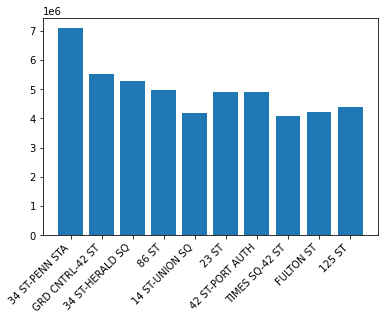

In [90]:
plt.bar(dfmta_entries_exits_sorted.STATION,dfmta_entries_exits_sorted.ENTRIES)
plt.xticks(rotation=45, ha='right');

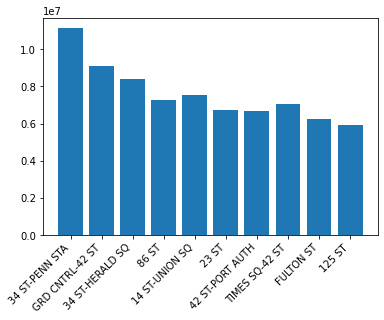

In [91]:
plt.bar(dfmta_entries_exits_sorted.STATION,dfmta_entries_exits_sorted.EXITS)
plt.xticks(rotation=45, ha='right');

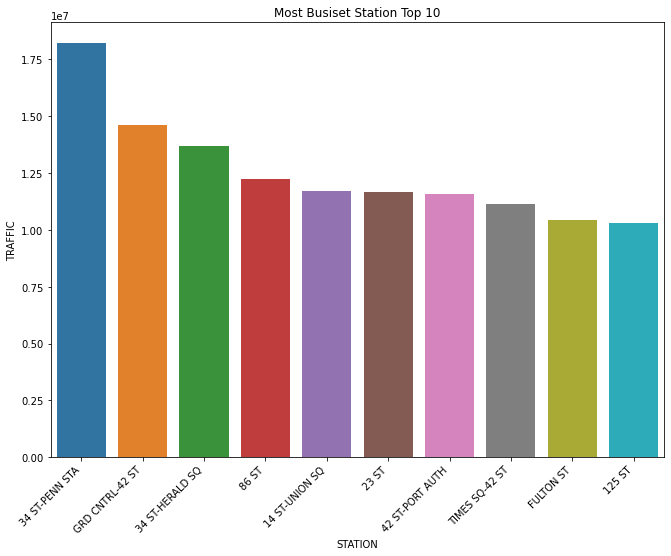

In [92]:
plt.figure(figsize=[11,8])
sns.barplot(x=dfmta_entries_exits_sorted.STATION, y=dfmta_entries_exits_sorted.TRAFFIC, data=dfmta_entries_exits_sorted)
plt.xticks(rotation=45, ha='right');
plt.title("Most Busiset Station Top 10");

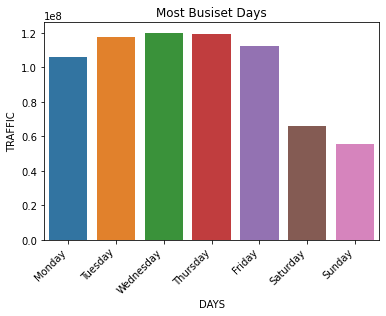

In [94]:
plt.figure(figsize=[6,4])
sns.barplot(x=dfmta_most_busiest_days.DAYS, y=dfmta_most_busiest_days.TRAFFIC, data=dfmta_most_busiest_days)
plt.xticks(rotation=45, ha='right');
plt.title("Most Busiset Days");